<a href="https://colab.research.google.com/github/trilgar/IAD2023/blob/main/CP5_%D0%97%D0%B0%D1%80%D0%B8%D1%86%D1%8C%D0%BA%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size="6"><b>Комп'ютерний практикум 5.

Лінійна регресія</b></font></center>

##<center>__Самостійні завдання__</center>

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP5.ipynb***

> Інсталюйте необхідні пакети бібліотек Python

### Завдання №1

Завантажте дані з ресурсу

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [115]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

df = pd.read_csv(URL)

In [116]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Завдання №2
Перевірте дані на пропущені значення, та при необхідності, поповніть їх 


In [117]:
print(df.isnull().sum())

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64


In [118]:
# Заповнення пропущених значень у стовпці
df['horsepower-binned'].fillna('Medium', inplace=True)
avg_stroke = df['stroke'].astype('float').mean()
df['stroke'].fillna(avg_stroke, inplace=True)
print(df.isnull().sum())

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64


### Завдання №3
Побудуйте кореляційну матрицю для всього датафрейму, визначте найбільш суттєві змінні по кореляційному зв'язку


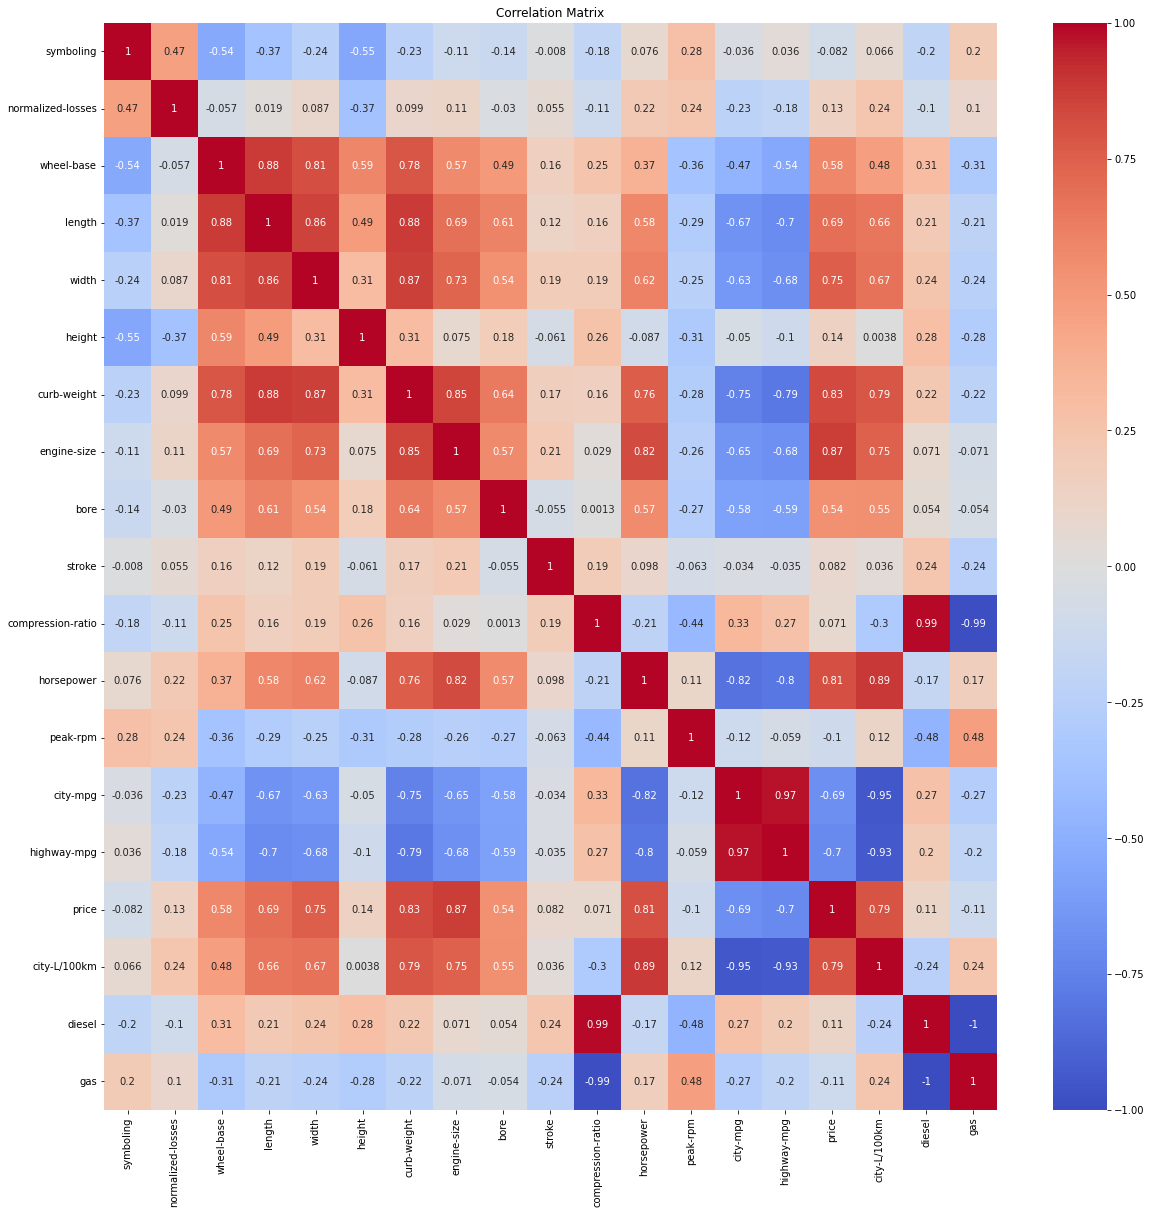

Найбільш суттєві змінні по кореляційному зв'язку: [('highway-mpg', 'city-mpg'), ('city-L/100km', 'city-mpg'), ('city-L/100km', 'highway-mpg'), ('diesel', 'compression-ratio'), ('gas', 'compression-ratio'), ('gas', 'diesel')]


In [119]:
# Побудова кореляційної матриці
corr_matrix = df.corr()

# Відображення кореляційної матриці за допомогою heatmap з бібліотеки seaborn
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Знаходження найбільш суттєвих змінних по кореляційному зв'язку
corr_threshold = 0.9
significant_corr_vars = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            var_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
            significant_corr_vars.append(var_pair)

print(f"Найбільш суттєві змінні по кореляційному зв'язку: {significant_corr_vars}")


### Завдання №4
Оберіть дві змінні, відмінні від лекційного прикладу
* побудуйте рівняння лінійної регресії
* виведіть коефіцієнти регресії
* знайдіть $R^2$ 
* знайдіть $MSE$
* побудуйте графік з точковим розподілом та рівнянням лінії регресії
* побудуйте графік залишків моделі
* зробіть висновки по моделі, проаналізуйте графік залишків, як ви вважаєте чи присутня автокореляція в моделі

In [120]:
X = df[['highway-mpg']]
y = df['city-mpg']

# Ініціалізуємо модель лінійної регресії
model = LinearRegression()

# Застосовуємо модель до даних
model.fit(X, y)

# Виводимо коефіцієнти лінійної регресії
print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)

Intercept:  -2.9341752627012525
Coefficients:  [0.91614287]


In [121]:
R2 = model.score(X, y)
print('R^2: ', R2)

R^2:  0.9448689661720486


In [122]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X)
MSE = mean_squared_error(y, y_pred)
print('MSE: ', MSE)

MSE:  2.263266694580697


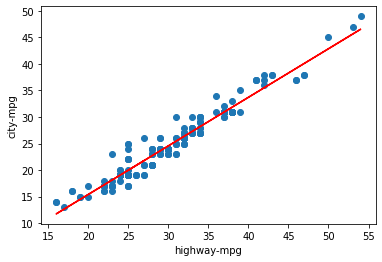

In [123]:
# побудувати графік з точковим розподілом
plt.scatter(df['highway-mpg'], df['city-mpg'])

# додати рівняння лінії регресії
plt.plot(df['highway-mpg'], y_pred, color='red')

# налаштувати осі
plt.xlabel('highway-mpg')
plt.ylabel('city-mpg')

# показати графік
plt.show()

### Завдання №5
Оберіть 5 змінних, відмінних від лекційного прикладу
* побудуйте рівняння множинної лінійної регресії
* виведіть коефіцієнти регресії
* знайдіть $R^2$ 
* знайдіть $MSE$
* зробіть висновки по моделі, як ви вважаєте чи присутня мультиколінеарність в моделі

In [124]:
X = df[['normalized-losses', 'width', 'engine-size', 'stroke', 'peak-rpm']]

# Залежна змінна - це Horsepower
y = df['horsepower']

# створити об'єкт моделі лінійної регресії
model = LinearRegression()

# навчити модель наших даних
model.fit(X, y)

# вивести коефіцієнти регресії
print(model.intercept_)
print(model.coef_)

-198.80862889797527
[ 4.37200979e-02  1.02089585e+02  7.75010753e-01 -8.86149991e+00
  2.61811923e-02]


In [125]:
R2 = model.score(X, y)
print('R^2: ', R2)

R^2:  0.7948855773050661


In [126]:
y_pred = model.predict(X)
MSE = mean_squared_error(y, y_pred)
print('MSE: ', MSE)

MSE:  284.9550585118761


Значення R^2 досить високе (більше 0.7), що свідчить про те, що лінійна модель може добре пояснити відповідність між ['normalized-losses', 'width', 'engine-size', 'stroke', 'peak-rpm'] та ['horsepower']
Це означає, що вибрані змінні можуть бути корисними для передбачення кінських сил автомобіля. MSE також є досить низьким, що є хорошим показником точності моделі.

Щодо мультиколінеарності, ми не можемо зробити остаточний висновок без більш детального аналізу кореляції між іншими змінними. Однак, мультиколінеарність може бути підозрювана, оскільки декілька змінних в моделі можуть бути взаємозалежними між собою. Це може привести до нестабільних та неточних оцінок коефіцієнтів регресії та спотворення їх значень. Для оцінки мультиколінеарності можна також використовувати методи, такі як визначення коефіцієнта кореляції Пірсона між змінними або використання діаграмм розсіювання. Якщо виявляється висока кореляція між декількома змінними, це може свідчити про мультиколінеарність.

### Завдання №6
Оберіть дві змінних з завдання 4
* побудуйте поліноміальну регресію порядку 2
* побудуйте поліноміальну регресію порядку 3
* побудуйте поліноміальну регресію порядку 4
* знайдіть $R^2$ для всих моделей
* знайдіть $MSE$ для всих моделей
* побудуйте графік з точковим розподілом та поліноміальними функціями
* зробіть висновки по моделям, враховуючи і лінійну регресію в завданні 4, оберіть найкращу на вашу думку модель.

In [127]:
metrics = pd.DataFrame(index=['R2', 'MSE'])

In [128]:
def plot_prediction(y_pred):
  # побудувати графік з точковим розподілом
  plt.scatter(df['engine-size'], df['horsepower'])

  # додати рівняння лінії регресії
  plt.plot(df['engine-size'], y_pred, color='red')

  # налаштувати осі
  plt.xlabel('engine-size')
  plt.ylabel('horsepower')

  # показати графік
  plt.show()

Intercept:  35.154126218821744
Coefficients:  [ 0.00000000e+00  2.17538199e-01 -3.04208692e-02 -1.45775870e-03
  2.19482866e-04  3.06257116e-06]


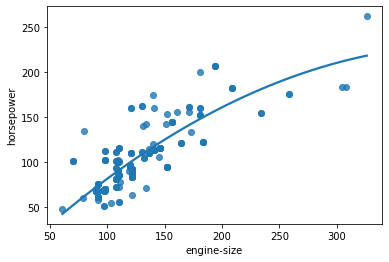

In [129]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['engine-size', 'peak-rpm']]
y = df['horsepower']

# Перетворення вхідних змінних для побудови поліноміальної регресії порядку 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Побудова поліноміальної регресії порядку 2
lm_poly = LinearRegression()
lm_poly.fit(X_poly, y)

# Виведення коефіцієнтів поліноміальної регресії
print('Intercept: ', lm_poly.intercept_)
print('Coefficients: ', lm_poly.coef_)


R2 = lm_poly.score(X_poly, y)
y_pred = lm_poly.predict(X_poly)
MSE = mean_squared_error(y, y_pred)

metrics['Poly2'] = [R2, MSE]

# Побудова графіку з точковим розподілом та рівнянням поліноміальної регресії порядку 2
sns.regplot(x='engine-size', y='horsepower', data=df, order=2, ci=None)
plt.show()

Intercept:  67.89126558474244
Coefficients:  [ 0.00000000e+00  2.27395603e+00 -1.44675052e-01 -2.24414197e-02
  6.84699667e-04  2.65068754e-05  6.51780304e-06  3.54466705e-06
 -1.52306243e-07 -6.39469366e-10]


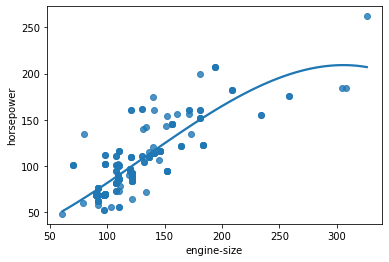

In [130]:
# Перетворення вхідних змінних для побудови поліноміальної регресії порядку 2
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Побудова поліноміальної регресії порядку 2
lm_poly = LinearRegression()
lm_poly.fit(X_poly, y)

# Виведення коефіцієнтів поліноміальної регресії
print('Intercept: ', lm_poly.intercept_)
print('Coefficients: ', lm_poly.coef_)


R2 = lm_poly.score(X_poly, y)
y_pred = lm_poly.predict(X_poly)
MSE = mean_squared_error(y, y_pred)

metrics['Poly3'] = [R2, MSE]

# Побудова графіку з точковим розподілом та рівнянням поліноміальної регресії порядку 2
sns.regplot(x='engine-size', y='horsepower', data=df, order=3, ci=None)
plt.show()

Intercept:  3297.085525022949
Coefficients:  [ 0.00000000e+00  2.50727036e-01 -2.58947142e+00  2.53742336e-02
 -5.81544079e-04  7.40488893e-04  1.64620800e-06 -1.53192467e-05
  5.86036263e-07 -9.60504912e-08  2.13241262e-07 -2.97329050e-08
  3.36143535e-09 -1.10601564e-10  5.11979348e-12]


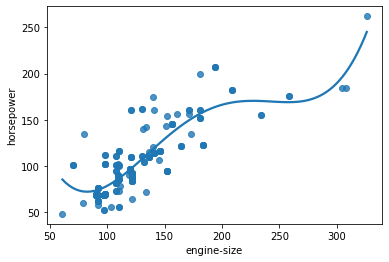

In [131]:
# Перетворення вхідних змінних для побудови поліноміальної регресії порядку 2
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Побудова поліноміальної регресії порядку 2
lm_poly = LinearRegression()
lm_poly.fit(X_poly, y)

# Виведення коефіцієнтів поліноміальної регресії
print('Intercept: ', lm_poly.intercept_)
print('Coefficients: ', lm_poly.coef_)


R2 = lm_poly.score(X_poly, y)
y_pred = lm_poly.predict(X_poly)
MSE = mean_squared_error(y, y_pred)

metrics['Poly4'] = [R2, MSE]

# Побудова графіку з точковим розподілом та рівнянням поліноміальної регресії порядку 2
sns.regplot(x='engine-size', y='horsepower', data=df, order=4, ci=None)
plt.show()

Intercept:  -137.10420787902729
Coefficients:  [0.81876051 0.02669752]


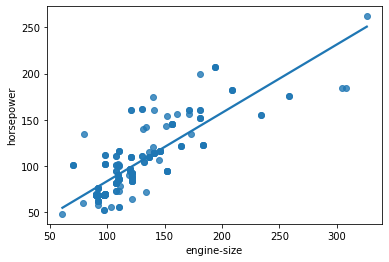

In [132]:
# Побудова поліноміальної регресії порядку 2
lm = LinearRegression()
lm.fit(X, y)

# Виведення коефіцієнтів поліноміальної регресії
print('Intercept: ', lm.intercept_)
print('Coefficients: ', lm.coef_)


R2 = lm.score(X, y)
y_pred = lm.predict(X)
MSE = mean_squared_error(y, y_pred)

metrics['linear'] = [R2, MSE]

# Побудова графіку з точковим розподілом та рівнянням поліноміальної регресії порядку 2
sns.regplot(x='engine-size', y='horsepower', data=df, order=1, ci=None)
plt.show()

In [133]:
metrics

,Poly2,Poly3,Poly4,linear
R2,0.824624,0.837943,0.857815,0.785800
MSE,243.641018,225.137642,197.530952,297.576972


Як бачимо, поліноміальні моделі суттєво покращили результати. Можемо бачити, що залежність між змінними явно нелінійна, оскільки при збільшенні порядку поліноміальної регресії, обидві метрики тільки покращуються.